In [18]:
import numpy as np
import pandas as pd
import torch
import pickle

In [2]:
# def score_function(true,pred,threshold = 4009.7):
#     score_list = []
#     for i in range(len(true)):
#         if true[i]>=threshold:
#             term1 = np.power((true[i]-threshold),2)
#         else:
#             term1 = 0
#         if pred[i]>=threshold:
#             term2 = np.power((pred[i]-threshold),2)
#             term3 = 2*(pred[i]-threshold)*(true[i]-pred[i])
#         else:
#             term2 = 0
#             term3 = 0
#         score_list.append(term1-term2-term3)
#     return(np.mean(score_list))

In [3]:
# def score_function(true,pred,threshold = 4009.7):
#     score_list = []
#     for i in range(len(true)):
#         if true[i]>=threshold:
#             score_list.append(MSE(true[i],pred[i]))
#     return(np.mean(score_list))

In [4]:
def PEC(true,pred):
    return((pred-true)/true)

In [30]:
def fun_y(x):
    y = []
    for i in range(len(x)):
        if x[i]<=-0.05:
            q = float(72*x[i]**8+128*x[i]**6+16*x[i]**4+44*x[i]**2+np.random.normal(0,0.005,1))
            if q<=0:
                y.append(0)
            elif q>1:
                y.append(1)
            else:
                y.append(q)
        elif x[i]<=-0.02:
            q = float(72*x[i]**8+64*x[i]**6+16*x[i]**4+36*x[i]**2+np.random.normal(0,0.005,1))
            if q<=0:
                y.append(0)
            elif q>=1:
                y.append(1)
            else:
                y.append(q)
        elif x[i]<=-0.01:
            q = float(72*x[i]**8+48*x[i]**6+14*x[i]**4+36*x[i]**2+np.random.normal(0,0.005,1))
            if q<=0:
                y.append(0)
            elif q>=1:
                y.append(1)
            else:
                y.append(q)
        elif x[i]<=0:
            q = float(24*x[i]**8+24*x[i]**6+12*x[i]**4+36*x[i]**2+np.random.normal(0,0.005,1))
            if q<=0:
                y.append(0)
            elif q>=1:
                y.append(1)
            else:
                y.append(q)
        elif x[i]<=0.02:
            q = float(24*x[i]**8+24*x[i]**6+12*x[i]**4+34*x[i]**2+np.random.normal(0,0.005,1))
            if q<=0:
                y.append(0)
            elif q>=1:
                y.append(1)
            else:
                y.append(q)
        elif x[i]<=0.1:
            q = float(24*x[i]**8+20*x[i]**6+12*x[i]**4+30*x[i]**2+np.random.normal(0,0.005,1))
            if q<=0:
                y.append(0)
            elif q>=1:
                y.append(1)
            else:
                y.append(q)
        else:
            q = float(20*x[i]**8+20*x[i]**6+12*x[i]**4+16*x[i]**3+32*x[i]**2+np.random.normal(0,0.005,1))
            if q<=0:
                y.append(0)
            elif q>=1:
                y.append(1)
            else:
                y.append(q)
        
    return y
    
        

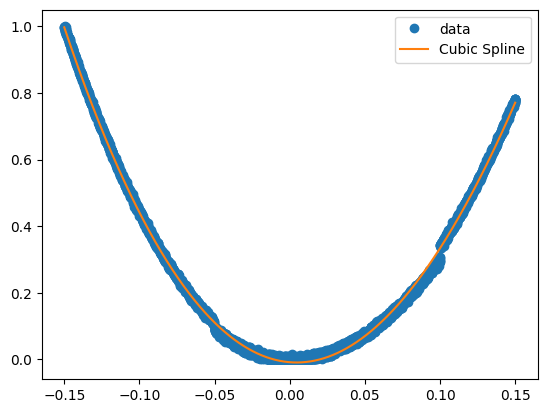

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from scipy.integrate import cumtrapz

# 生成数据
qx = np.random.uniform(-0.15, 0.15, 5000)
qy = fun_y(qx)
df = pd.DataFrame({'col1': qx, 'col2': qy})
df = df.sort_values(by='col1')
# df.to_csv('./simulated_data.csv',index=False)
qx = df.iloc[:,0]
qy = df.iloc[:,1]
# 进行样条函数拟合
spline = UnivariateSpline(qx, qy, k = 3,s=0.5)

# 绘制原始数据和拟合曲线
plt.plot(qx, qy, 'o', label='data')
plt.plot(qx, spline(qx), label='Cubic Spline')

plt.legend()
plt.show()

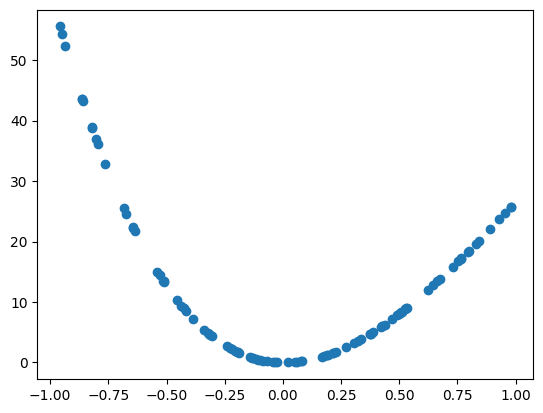

In [7]:
vv = np.random.uniform(-1 ,1, 100)
plt.plot(vv, spline(vv),'o', label='Cubic Spline')

In [8]:
threshold = 0.15

In [9]:
length = 15000
K_x = np.random.uniform(-threshold, threshold, length)
K_x.sort()
K_y_smooth_2 = spline.derivative(n=2)(K_x)
K_yy = np.power(K_y_smooth_2,2/5)
# 使用cumtrapz函数计算累积积分
K_y_int = cumtrapz(K_yy, K_x, axis=0, initial=0)
K_y_int = np.power(K_y_int,5/2)

In [10]:
for i in range(1,500):
    if K_y_int[-1]/(np.sqrt(120)*(i**2))<=0.005:
        print(i)
        K=i
        break

9


In [12]:
point = []
point.append(-threshold)
all_x = np.random.uniform(-threshold, threshold, length)
all_x.sort()
all_y_smooth_2 = spline.derivative(n=2)(all_x)
all_yy = np.power(np.abs(all_y_smooth_2),2/5)
all = cumtrapz(all_yy, all_x, axis=0, initial=0)[-1]
for i,k in enumerate(np.linspace(-threshold,threshold,length*10)):
    if len(point)==K:
        break
    else:
        start_point = point[-1]
        end_point = k
        x = np.linspace(start_point,end_point,length)
        y = spline.derivative(n=2)(x)
        yy = np.power(np.abs(y),2/5)
        iter = (cumtrapz(yy, x, axis=0, initial=0)[-1])/all
        if np.abs(iter-1/K)<=0.0001:
            point.append(end_point)
        

In [13]:
start_point = point[-1]
# end_point = point[-1]
end_point = 0.15
x = np.linspace(start_point,end_point,150000)
y = spline.derivative(n=2)(x)
yy = np.power(np.abs(y),2/5)
iter = (cumtrapz(yy, x, axis=0, initial=0)[-1])/all
print(iter)

0.11221502503870012


In [14]:
1/K

0.1111111111111111

In [15]:
point.pop(0)

-0.15

均方误差（MSE）： 5.781407147121053e-05


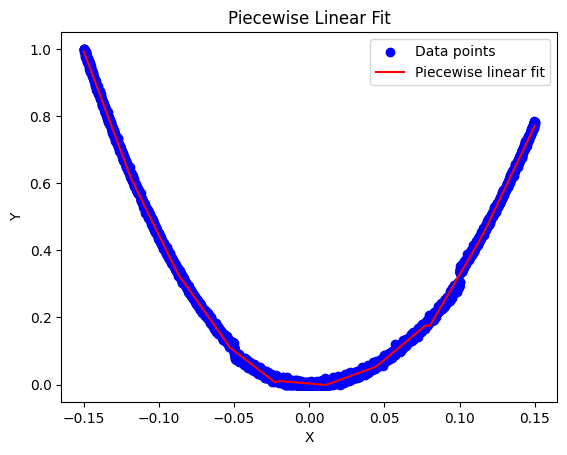

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# 示例数据
X = np.array(df.iloc[:,0])
Y = np.array(df.iloc[:,1])

# 分段点
break_points = point

# 根据分段点将数据分组
segments = [(X < break_points[0])]
for i in range(1, len(break_points)):
    mask = (X >= break_points[i-1]) & (X < break_points[i])
    segments.append(mask)

segments.append(X >= break_points[-1])

# 对每个部分进行线性拟合
linear_models = []
for mask in segments:
    X_part = X[mask]
    Y_part = Y[mask]
    model = np.polyfit(X_part, Y_part, 1)
    linear_models.append(model)

# 预测
def predict(x):
    for i, (m, b) in enumerate(linear_models):
        if x < break_points[i]:
            return m * x + b
        if i == len(break_points) - 1:
            break
    return linear_models[-1][0] * x + linear_models[-1][1]

# 计算MSE
mse = np.mean([(predict(x) - y)**2 for x, y in zip(X, Y)])
print("均方误差（MSE）：", mse)

# 可视化结果
plt.scatter(X, Y, color='blue', label='Data points')
x_vals1 = np.linspace(min(X), max(X), 100)
y_vals1 = [predict(x) for x in x_vals]
plt.plot(x_vals1, y_vals1, color='red', label='Piecewise linear fit')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Piecewise Linear Fit')
plt.show()

均方误差（MSE）： 5.781407147121053e-05


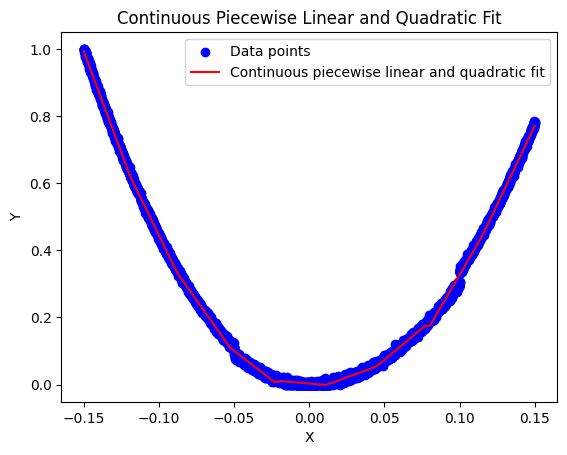

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# 示例数据
X = np.array(df.iloc[:,0])
Y = np.array(df.iloc[:,1])

# 分段点
break_points = point

# 指定重叠区域宽度
overlap = 0.000001

# 对每个部分进行线性拟合
linear_models = []
for i in range(len(break_points) + 1):
    if i == 0:
        mask = X < break_points[i]
    elif i == len(break_points):
        mask = X >= break_points[i - 1]
    else:
        mask = (X >= break_points[i - 1]) & (X < break_points[i])

    X_part = X[mask]
    Y_part = Y[mask]
    model = np.polyfit(X_part, Y_part, 1)
    linear_models.append(model)

# 在间断点附近构建二次函数
quadratic_models = []
for i in range(1, len(linear_models)):
    m1, b1 = linear_models[i - 1]
    m2, b2 = linear_models[i]
    x0 = break_points[i - 1]

    # 二次函数的系数
    a = (m2 - m1) / (4 * overlap)
    b = m1 - 2 * a * (x0 - overlap)
    c = m1 * (x0 - overlap) + b1 - a * (x0 - overlap)**2 - b * (x0 - overlap)

    quadratic_models.append((a, b, c))

# 预测函数
def predict(x):
    for i, (m, b) in enumerate(linear_models):
        if x < break_points[i] - overlap:
            return m * x + b
        elif x < break_points[i] + overlap:
            a, b, c = quadratic_models[i - 1]
            return a * x**2 + b * x + c
        if i == len(break_points) - 1:
            break
    return linear_models[-1][0] * x + linear_models[-1][1]

# 计算MSE
mse = np.mean([(predict(x) - y)**2 for x, y in zip(X, Y)])
print("均方误差（MSE）：", mse)

# 可视化结果
plt.scatter(X, Y, color='blue', label='Data points')
x_vals = np.linspace(min(X), max(X), 100)
y_vals = [predict(x) for x in x_vals]
plt.plot(x_vals, y_vals, color='red', label='Continuous piecewise linear and quadratic fit')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Continuous Piecewise Linear and Quadratic Fit')
plt.show()

In [23]:
error = [(predict(x) - y)**2 for x, y in zip(X, Y)]

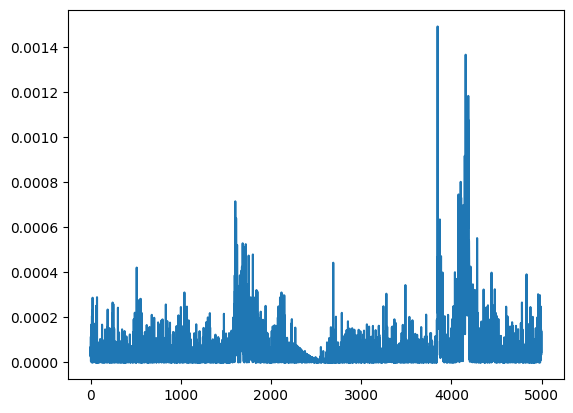

In [24]:
plt.plot(error)

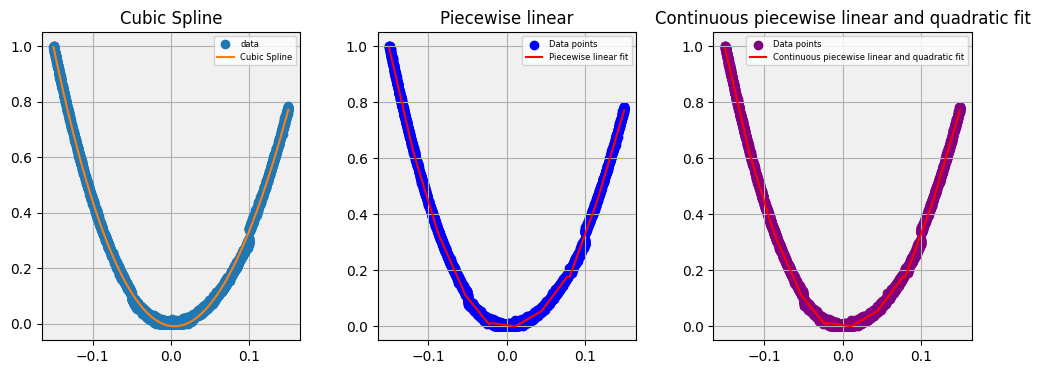

In [56]:
# 创建一行三列的子图
fig, axs = plt.subplots(1, 3, figsize=(12, 4))  # figsize 调整整个图的大小

lighter_gray = "#F0F0F0"
for ax in axs:
    # 设置子图的背景颜色为浅灰色
    ax.set_facecolor(lighter_gray)
    
    # 在子图上添加网格
    ax.grid(True)


# 在子图 1 中绘制数据


axs[0].plot(qx, qy, 'o', label='data')
axs[0].plot(qx, spline(qx), label='Cubic Spline')
axs[0].set_title("Cubic Spline")
axs[0].legend(fontsize=6)

# 在子图 2 中绘制数据
axs[1].scatter(X, Y, color='blue', label='Data points')
x_vals1 = np.linspace(min(X), max(X), 100)
y_vals1 = [predict(x) for x in x_vals]
axs[1].plot(x_vals1, y_vals1, color='red', label='Piecewise linear fit')
axs[1].legend(fontsize=6)
axs[1].set_title("Piecewise linear")

# 在子图 3 中绘制数据
axs[2].scatter(X, Y, color='purple', label='Data points')
x_vals = np.linspace(min(X), max(X), 100)
y_vals = [predict(x) for x in x_vals]
axs[2].plot(x_vals, y_vals, color='red', label='Continuous piecewise linear and quadratic fit')
axs[2].legend(fontsize=6)
axs[2].set_title("Continuous piecewise linear and quadratic fit")

# 添加整个图的标题
# fig.suptitle("Different data fitting methods")

# 调整子图之间的间距
fig.subplots_adjust(wspace=0.3)
fig.savefig("./fitted.pdf",bbox_inches='tight')
# 显示图形
plt.show()